In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import os
print(os.listdir("../input/houseprices/"))
# Any results you write to the current directory are saved as output./

['Predicting-House-Prices-In-Bengaluru-Train-Data.csv', 'Predicting-House-Prices-In-Bengaluru-Test-Data.csv']


In [6]:
df_train = pd.read_csv("../input/houseprices/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")
df_train.head()

area_type   availability   ...   balcony   price
0  Super built-up  Area         19-Dec   ...       1.0   39.07
1            Plot  Area  Ready To Move   ...       3.0  120.00
2        Built-up  Area  Ready To Move   ...       3.0   62.00
3  Super built-up  Area  Ready To Move   ...       1.0   95.00
4  Super built-up  Area  Ready To Move   ...       1.0   51.00

[5 rows x 9 columns]

In [7]:
df_train.shape #shape of train data

(13320, 9)

In [8]:
df_train.columns 

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df_test = pd.read_csv("../input/houseprices/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")
#transpose
df_test.head()

area_type   availability  ...  balcony price
0  Super built-up  Area  Ready To Move  ...      2.0   NaN
1            Plot  Area  Ready To Move  ...      2.0   NaN
2            Plot  Area         18-Apr  ...      2.0   NaN
3  Super built-up  Area  Ready To Move  ...      1.0   NaN
4  Super built-up  Area  Ready To Move  ...      1.0   NaN

[5 rows x 9 columns]

In [10]:
# Analyse price

#descriptive statistics summary
df_train['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

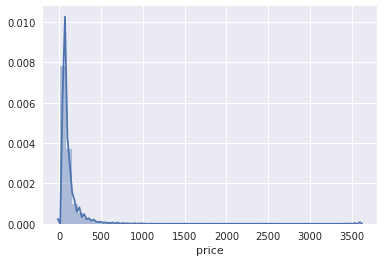

In [11]:
#histogram
sns.distplot(df_train['price']);

In [12]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 8.064469
Kurtosis: 108.166513


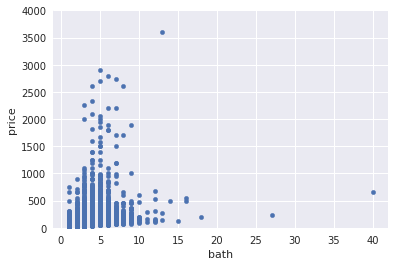

In [13]:
#scatter plot bath/price
var = 'bath'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,4000));

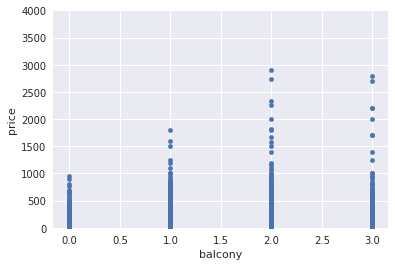

In [14]:
#scatter plot balcony/price
var = 'balcony'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,4000));

In [15]:
df_train.total_sqft.dtype

dtype('O')

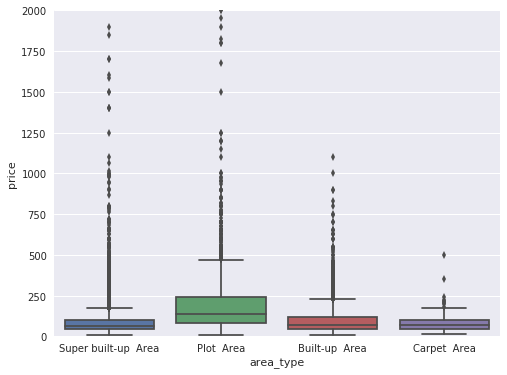

In [16]:
#box plot area_type/price
var = 'area_type'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2000);

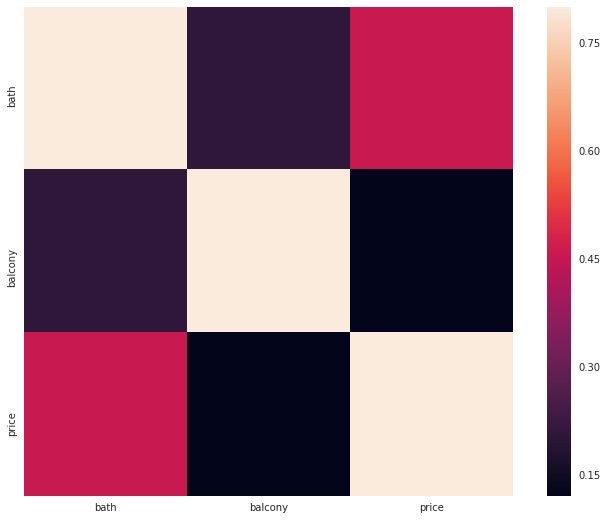

In [17]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [18]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
society        5502  0.413063
balcony         609  0.045721
bath             73  0.005480
size             16  0.001201
location          1  0.000075
price             0  0.000000
total_sqft        0  0.000000
availability      0  0.000000
area_type         0  0.000000

In [19]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.70194252]
 [-0.69898883]
 [-0.69522958]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68683841]]

outer range (high) of the distribution:
[[14.01281655]
 [14.34846342]
 [14.9526278 ]
 [16.69799156]
 [16.69799156]
 [17.36928531]
 [17.61095106]
 [18.04057906]
 [18.79242807]
 [23.41092909]]


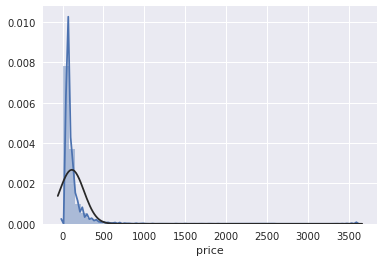

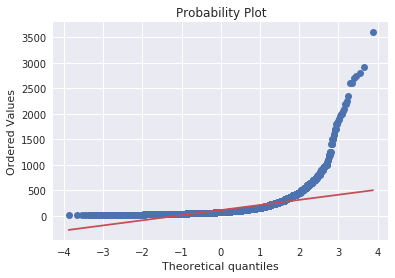

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [21]:
#applying log transformation
df_train['price'] = np.log(df_train['price'])

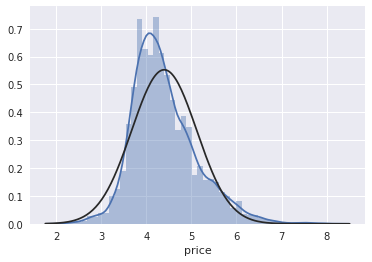

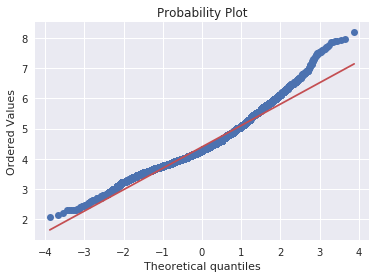

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [23]:
df_train['area_type'].value_counts() 

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [24]:
df_train['availability'].value_counts().head()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: availability, dtype: int64

In [25]:
df_train['location'].value_counts()

Whitefield                               540
Sarjapur  Road                           399
Electronic City                          302
Kanakpura Road                           273
Thanisandra                              234
Yelahanka                                213
Uttarahalli                              186
Hebbal                                   177
Marathahalli                             175
Raja Rajeshwari Nagar                    171
Hennur Road                              152
Bannerghatta Road                        152
7th Phase JP Nagar                       149
Haralur Road                             142
Electronic City Phase II                 132
Rajaji Nagar                             107
Chandapura                               100
Bellandur                                 96
KR Puram                                  91
Hoodi                                     88
Electronics City Phase 1                  88
Yeshwanthpur                              85
Begur Road

In [26]:
df_train['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
18 Bedroom       1
12 Bedroom       1
16 BHK           1
19 BHK           1
13 BHK           1
14 BHK           1
43 Bedroom       1
27 BHK           1
Name: size, dtype: int64

In [27]:
df_train['total_sqft'].value_counts()

1200               843
1100               221
1500               205
2400               196
600                180
1000               172
1350               133
1050               123
1300               117
1250               114
900                112
1400               108
1800               104
1600               101
1150               101
1140                91
2000                83
1450                70
1650                69
800                 67
1075                66
3000                66
1020                63
2500                62
1160                60
1550                60
1125                60
950                 59
1700                58
1180                58
                  ... 
3042                 1
3664                 1
3530                 1
250                  1
3671                 1
3560                 1
547.34 - 827.31      1
2317                 1
638                  1
315Sq. Yards         1
2041 - 2090          1
2820                 1
2956       

In [28]:
df_train = df_train.drop_duplicates()

In [29]:
df_train = df_train.drop('society', axis=1) 
df_test = df_test.drop('society', axis=1) # drop society variable as it contains 41% missing data

In [30]:
df_test = df_test.drop('price', axis=1)

In [31]:
df_train = df_train.dropna() #drop all Nan Values

In [32]:
df_test = df_test.fillna(-1) 

In [33]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [34]:
# concat train and test dataframe for analysis
Y = df_train['price']
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (13665, 7)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
all_data['size'] = all_data['size'].astype('str')

In [36]:
# Extract Bedroom from size dataframe
all_data['size'].str.extract('([0-9]+\s[A-Z][a-z]+)', expand=True)

0
0            NaN
1      4 Bedroom
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8      4 Bedroom
9            NaN
10           NaN
11     3 Bedroom
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19     4 Bedroom
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
...          ...
13635        NaN
13636  2 Bedroom
13637        NaN
13638        NaN
13639        NaN
13640        NaN
13641        NaN
13642        NaN
13643  8 Bedroom
13644        NaN
13645        NaN
13646        NaN
13647        NaN
13648        NaN
13649        NaN
13650        NaN
13651  4 Bedroom
13652        NaN
13653        NaN
13654  8 Bedroom
13655        NaN
13656        NaN
13657  1 Bedroom
13658  4 Bedroom
13659        NaN
13660        NaN
13661        NaN
13662        NaN
13663        NaN
13664        NaN

[13665 rows x 1 columns]

In [37]:
# Extract BHK from size dataframe
all_data['size'].str.extract('([0-9]+\s[A-Z][A-Z]+)', expand=True)

0
0      2 BHK
1        NaN
2      3 BHK
3      3 BHK
4      2 BHK
5      2 BHK
6      3 BHK
7      3 BHK
8        NaN
9      2 BHK
10     2 BHK
11       NaN
12     2 BHK
13     3 BHK
14     3 BHK
15     3 BHK
16     2 BHK
17     1 BHK
18     3 BHK
19       NaN
20     3 BHK
21      1 RK
22     3 BHK
23     2 BHK
24     3 BHK
25     2 BHK
26     3 BHK
27     4 BHK
28     3 BHK
29     3 BHK
...      ...
13635  2 BHK
13636    NaN
13637  2 BHK
13638  3 BHK
13639  2 BHK
13640  3 BHK
13641  2 BHK
13642  3 BHK
13643    NaN
13644  3 BHK
13645  3 BHK
13646  3 BHK
13647  2 BHK
13648  2 BHK
13649  2 BHK
13650  3 BHK
13651    NaN
13652  2 BHK
13653  2 BHK
13654    NaN
13655  2 BHK
13656  3 BHK
13657    NaN
13658    NaN
13659  4 BHK
13660  2 BHK
13661  3 BHK
13662  2 BHK
13663  2 BHK
13664  2 BHK

[13665 rows x 1 columns]

In [38]:
all_data.head(2)

area_type   availability     ...           size  total_sqft
0  Super built-up  Area         19-Dec     ...          2 BHK        1056
1            Plot  Area  Ready To Move     ...      4 Bedroom        2600

[2 rows x 7 columns]

In [39]:

all_data['total_sqft'] = all_data['total_sqft'].str.extract('([0-9]+)', expand=True)

In [40]:
all_data.head()

area_type   availability     ...           size  total_sqft
0  Super built-up  Area         19-Dec     ...          2 BHK        1056
1            Plot  Area  Ready To Move     ...      4 Bedroom        2600
2        Built-up  Area  Ready To Move     ...          3 BHK        1440
3  Super built-up  Area  Ready To Move     ...          3 BHK        1521
4  Super built-up  Area  Ready To Move     ...          2 BHK        1200

[5 rows x 7 columns]

In [41]:
# Create a new column size_BHK
all_data['size_BHK'] = all_data['size']

In [42]:
# Create a new column size_bed
all_data['size_bed'] = all_data['size']

In [43]:
all_data['size_BHK'] = all_data['size'].str.extract('([0-9]+\s[A-Z][A-Z]+)', expand=True)

In [44]:
all_data['size_bed'] = all_data['size'].str.extract('([0-9]+\s[A-Z][a-z]+)', expand=True)

In [45]:
# Extract the numerical part
all_data['size_BHK'] = all_data['size_BHK'].str.extract('([0-9]+)', expand=True)

In [46]:
# Extract the numerical part
all_data['size_bed'] = all_data['size_bed'].str.extract('([0-9]+)', expand=True)

In [47]:
all_data.head()

area_type   availability    ...     size_BHK  size_bed
0  Super built-up  Area         19-Dec    ...            2       NaN
1            Plot  Area  Ready To Move    ...          NaN         4
2        Built-up  Area  Ready To Move    ...            3       NaN
3  Super built-up  Area  Ready To Move    ...            3       NaN
4  Super built-up  Area  Ready To Move    ...            2       NaN

[5 rows x 9 columns]

In [48]:
# Fill NA values with 0
all_data['size_BHK'] = all_data['size_BHK'].fillna(0)

In [49]:
# Fill NA values with 0
all_data['size_bed'] = all_data['size_bed'].fillna(0)

In [50]:
all_data.head(10)

area_type   availability    ...     size_BHK  size_bed
0  Super built-up  Area         19-Dec    ...            2         0
1            Plot  Area  Ready To Move    ...            0         4
2        Built-up  Area  Ready To Move    ...            3         0
3  Super built-up  Area  Ready To Move    ...            3         0
4  Super built-up  Area  Ready To Move    ...            2         0
5  Super built-up  Area  Ready To Move    ...            2         0
6  Super built-up  Area  Ready To Move    ...            3         0
7  Super built-up  Area         18-Feb    ...            3         0
8            Plot  Area  Ready To Move    ...            0         4
9  Super built-up  Area  Ready To Move    ...            2         0

[10 rows x 9 columns]

In [51]:
all_data = all_data.drop('size', axis=1)

In [52]:
all_data.head()

area_type   availability    ...     size_BHK  size_bed
0  Super built-up  Area         19-Dec    ...            2         0
1            Plot  Area  Ready To Move    ...            0         4
2        Built-up  Area  Ready To Move    ...            3         0
3  Super built-up  Area  Ready To Move    ...            3         0
4  Super built-up  Area  Ready To Move    ...            2         0

[5 rows x 8 columns]

In [53]:
# Ordinal Categorical Variable Treatment
all_data['area_type'] = all_data['area_type'].map({'Carpet  Area': 0, 'Plot  Area': 1, 'Built-up  Area': 2, 'Super built-up  Area': 3})

In [54]:
all_data.head()

area_type   availability  balcony   ...     total_sqft size_BHK size_bed
0          3         19-Dec      1.0   ...           1056        2        0
1          1  Ready To Move      3.0   ...           2600        0        4
2          2  Ready To Move      3.0   ...           1440        3        0
3          3  Ready To Move      1.0   ...           1521        3        0
4          3  Ready To Move      1.0   ...           1200        2        0

[5 rows x 8 columns]

In [55]:
all_data['availability'].str.extract('([0-9]+-[A-Z][a-z]+)', expand=True)

0
0      19-Dec
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7      18-Feb
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18     19-Dec
19        NaN
20        NaN
21     18-Nov
22     18-May
23        NaN
24     20-Dec
25     17-Oct
26        NaN
27     19-Dec
28        NaN
29        NaN
...       ...
13635     NaN
13636     NaN
13637     NaN
13638     NaN
13639  18-May
13640  18-Feb
13641     NaN
13642     NaN
13643     NaN
13644     NaN
13645     NaN
13646     NaN
13647  18-Dec
13648     NaN
13649  18-Dec
13650     NaN
13651     NaN
13652     NaN
13653     NaN
13654     NaN
13655     NaN
13656     NaN
13657  18-Aug
13658     NaN
13659     NaN
13660     NaN
13661     NaN
13662     NaN
13663  18-Feb
13664     NaN

[13665 rows x 1 columns]

In [56]:
all_data['availability'] = all_data['availability'].replace(to_replace = ['([0-9]+-[A-Z][a-z]+)'],value = 'a',regex = True)

In [57]:
# Making availability categorical variable
all_data['availability'] = all_data['availability'].map({'a': 0, 'Ready To Move': 1})

In [58]:
all_data.head()

area_type  availability  balcony   ...     total_sqft size_BHK size_bed
0          3           0.0      1.0   ...           1056        2        0
1          1           1.0      3.0   ...           2600        0        4
2          2           1.0      3.0   ...           1440        3        0
3          3           1.0      1.0   ...           1521        3        0
4          3           1.0      1.0   ...           1200        2        0

[5 rows x 8 columns]

In [59]:
all_data = all_data.drop('location', axis=1)

In [60]:
all_data.head()

area_type  availability  balcony  bath total_sqft size_BHK size_bed
0          3           0.0      1.0   2.0       1056        2        0
1          1           1.0      3.0   5.0       2600        0        4
2          2           1.0      3.0   2.0       1440        3        0
3          3           1.0      1.0   3.0       1521        3        0
4          3           1.0      1.0   2.0       1200        2        0

In [61]:
all_data['bath'] = all_data['bath'].astype('int')
all_data['total_sqft'] = all_data['total_sqft'].astype('float')
all_data['size_BHK'] = all_data['size_BHK'].astype('int')
all_data['size_bed'] = all_data['size_bed'].astype('int')

In [62]:
all_data.head()

area_type  availability  balcony    ...     total_sqft  size_BHK  size_bed
0          3           0.0      1.0    ...         1056.0         2         0
1          1           1.0      3.0    ...         2600.0         0         4
2          2           1.0      3.0    ...         1440.0         3         0
3          3           1.0      1.0    ...         1521.0         3         0
4          3           1.0      1.0    ...         1200.0         2         0

[5 rows x 7 columns]

In [63]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Creating Models

In [64]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [65]:
x_train, x_val, y_train, y_val = train_test_split(train,Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [66]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'metric': 'rmse', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 150 rounds.
[200]	valid_0's rmse: 0.372011
[400]	valid_0's rmse: 0.350146
[600]	valid_0's rmse: 0.347433
[800]	valid_0's rmse: 0.346755
[1000]	valid_0's rmse: 0.346538
[1200]	valid_0's rmse: 0.346438
Early stopping, best iteration is:
[1226]	valid_0's rmse: 0.346427


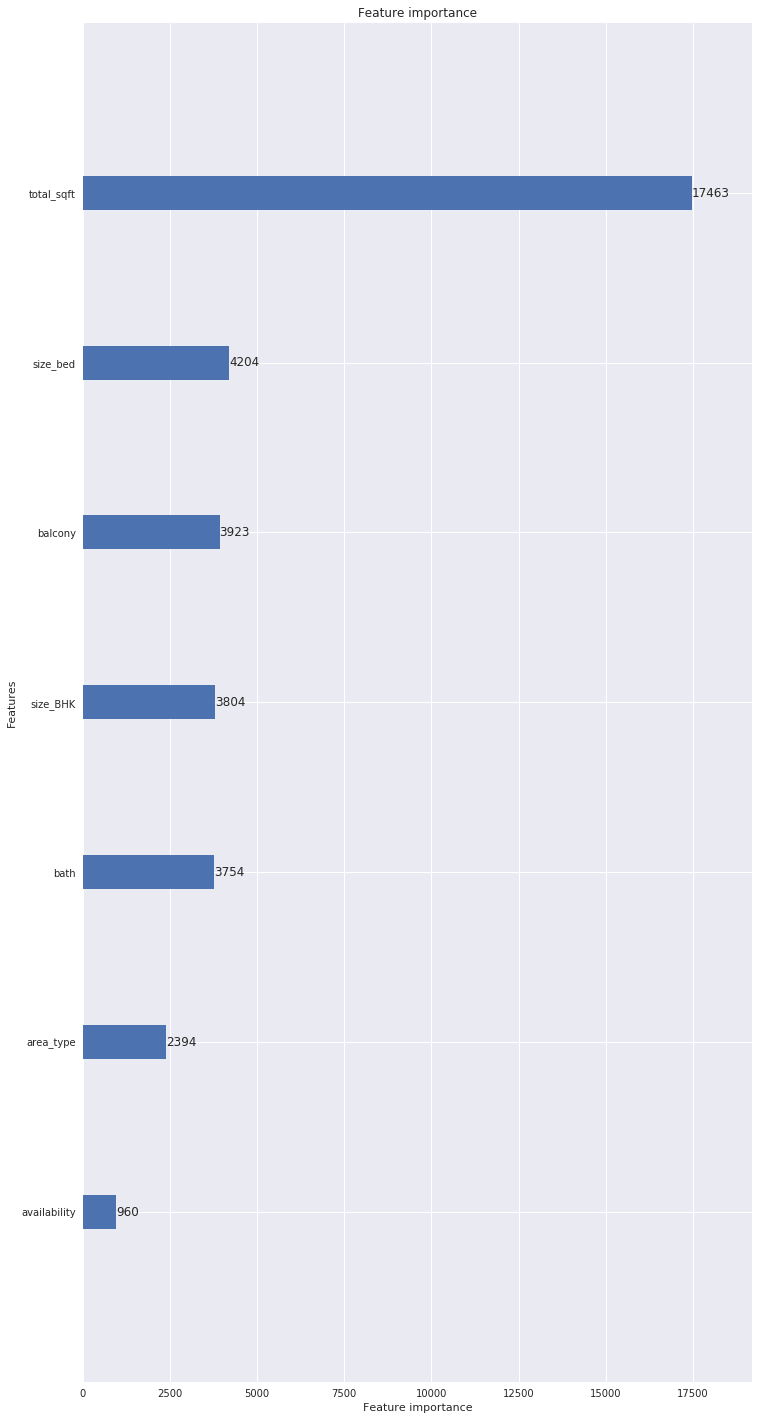

In [67]:
lgb.plot_importance(model, figsize=(12, 25));

# Base models

In [68]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [69]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [70]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [75]:
# Using Huber loss as they are robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [76]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [77]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [78]:
#Cross Validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [79]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5078 (0.0293)



In [80]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.5078 (0.0294)



In [81]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.3509 (0.0103)



In [82]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3514 (0.0077)



In [83]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3836 (0.0112)



In [84]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [85]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4256 (0.0189)



In [86]:
test = test.fillna(0)

In [87]:
# Root Mean Squared Error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [88]:
# Averaged Models
averaged_models.fit(train.values, Y)
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(Y, stacked_train_pred))

0.40673890609876423


In [89]:
# Xgboost Model
model_xgb.fit(train, Y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(Y, xgb_train_pred))

0.3215155371065921


In [90]:
# Light GBM
model_lgb.fit(train, Y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(Y, lgb_train_pred))

0.38030190108539985


In [91]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(Y,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.37609581328207004


In [92]:
# Trying Ensemble
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [93]:
ensemble

array([ 58.97267221, 413.85552607, 193.2024866 , ...,  59.77808346,
        47.14342229,  59.49042421])

In [94]:
sub_lgb = pd.DataFrame()
sub_lgb['price'] = ensemble
sub_lgb['price'] = np.around(sub_lgb['price'],decimals=4)

In [95]:
sub_lgb.to_excel("baseline.xlsx", index=False)
sub_lgb.head()

price
0   58.9727
1  413.8555
2  193.2025
3   72.3110
4   54.6313

## Further Improvements

1. Also include society as a feature by imputing it's missing values.
2. Try ensembling with different models
3. Further Hyperparameter optimization.